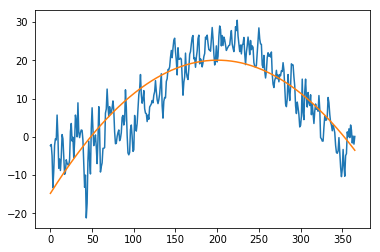

In [159]:
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime

%matplotlib inline
csv = np.genfromtxt('weather2.csv', delimiter = "," , skip_header=1)
month = csv[:,1]
day = csv[:,2]
#monthday = np.column_stack((month, day)) IGNORE. Alternative method of obtaining Month/Day as an index.

maxtemp = csv[:,4] #List of dependent variable arrays
mintemp = csv[:,6]
meantemp = csv[:,8]
HeatDegDays = csv[:,10]
CoolDegDays = csv[:,12]
TotalRain= csv[:,14]
TotalSnow= csv[:,16]
TotalPrecip= csv[:,18]
SnowOnGrnd = csv[:,20]
DirMaxGust = csv[:,22]
SpdMaxGust = csv[:,24]
monthday = np.arange('2016-01-01', '2017-01-01', dtype = 'datetime64[D]')
monthday = np.arange(0,366,1)


x = np.arange(0,366)
z = np.polyfit(monthday,meantemp,2)


'''
def parabola(coeff,x):
    y = []
    for i in x:
        y.append(coeff[2]*i**2 + coeff[1]*i + coeff[0])
    return y
'''
def parabola2(x,coeff):
    y = coeff[0]*x**2 + coeff[1]*x + coeff[2]
    return y 

plt.plot(monthday, meantemp)
plt.plot(monthday, parabola2(x,z))




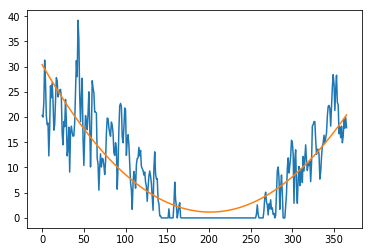

In [80]:
x = np.arange(0,366)
z = np.polyfit(monthday,HeatDegDays,2)
plt.plot(monthday, HeatDegDays)
plt.plot(monthday, parabola2(x,z))


(0, 13)

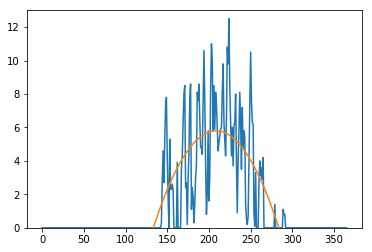

In [104]:
x = np.arange(125,295)
z = np.polyfit(monthday[125:295],CoolDegDays[125:295],2)
plt.plot(monthday,CoolDegDays)
plt.plot(monthday[125:295], parabola2(x,z))
plt.ylim(0, 13)


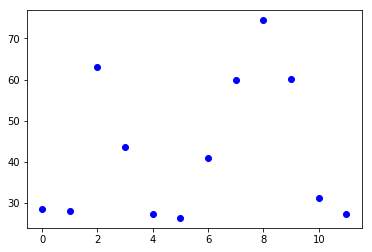

In [165]:
x1 = np.arange(0,30)
x2 = np.arange(60,100)
x3 = np.arange(150,350)

z1 = np.polyfit(monthday[0:30],TotalRain[0:30],2)
z2 = np.polyfit(monthday[60:100],TotalRain[60:100],2)
z3 = np.polyfit(monthday[150:350],TotalRain[150:350],5)



def rainadder(rainlist):
    totals = []
    total = 0
    for i in range(len(rainlist)):
        if (i % 31 == 0 and i != 0) or i == 364:
            totals.append(total)
            total = 0
        else:
            total += rainlist[i]
    return totals

x = np.arange(0,12,1)
plt.plot(x,(rainadder(TotalRain)),'bo')